In [1]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [81]:
import theano
import theano.tensor as T

##### 심볼 변수 정의

In [5]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')
x1, y1, type(x1), type(y1)

(x1, y1, theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [6]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')
type(x2), type(y2)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [12]:
x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')

##### 심볼 관계 정의



In [9]:
z1 = x1 + y1
type(z1)

theano.tensor.var.TensorVariable

In [10]:
u1 = T.exp(z1)
type(u1)

theano.tensor.var.TensorVariable

In [11]:
z2 = T.dot(x2, y2)

In [13]:
z3 = T.sum(x3) + T.mean(y3)

##### 심볼 프린트

In [14]:
theano.printing.pprint(x1)

'x1'

In [15]:
theano.printing.pprint(y1)

'y1'

In [16]:
theano.printing.pprint(z1)

'(x1 + y1)'

In [17]:
theano.printing.pprint(u1)

'exp((x1 + y1))'

In [18]:
from IPython.display import SVG

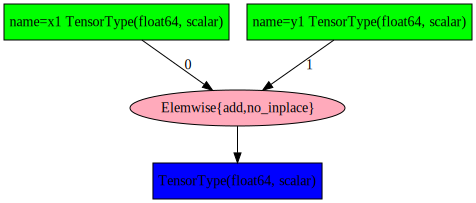

In [19]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

##### 심볼함수

In [21]:
%time f1 = theano.function(inputs=[x1, y1], outputs=z1)

CPU times: user 44.4 ms, sys: 71.1 ms, total: 116 ms
Wall time: 2.91 s


In [22]:
f1(5, 2)

array(7.)

In [23]:
f2 = theano.function([x2, y2], z2)
f2([1, 2], [3, 4])

array(11.)

In [24]:
f3 = theano.function([x3, y3], z3)
f3([[1], [2]], [[3], [4]])

array(6.5)

In [25]:
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
logistic(1)

array(0.73105858)

In [26]:
s2 = 1 / (1 + T.exp(-x2))
logistic2 = theano.function([x2], s2)
logistic2([0, 1])

array([0.5       , 0.73105858])

In [27]:
x1, y1 = T.dscalars('x1', 'y1')
z1 = x1 + y1
f1 = theano.function([x1, theano.In(y1, value=2)], z1)
f1(1)

array(3.)

In [29]:
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(0)
rv_u = srng.uniform()
f_rv_u = theano.function([], rv_u)

##### 변수 갱신

In [28]:
x = T.dscalar('x')
y = x
w = theano.shared(0.0, name="w")
update = theano.function([x], y, updates=[(w, w + x)])

In [30]:
w.set_value(f_rv_u())
w.get_value()

array(0.48604732)

In [31]:
update(1)
w.get_value()

array(1.48604732)

##### 그래프 최적화

In [ ]:
x1 = T.dvector('x1')


##### 미분

##### 연습 문제 1
- - -
- y값은 0과 1이라는 값만 가진다. (O)
- 활성화 함수는 로지스틱 함수를 사용한다. (O)
- 코스트 함수는 다음과 같은 오차 제곱 합수를 사용한다. (O)

In [83]:
import numpy as np
import matplotlib.pyplot as plt

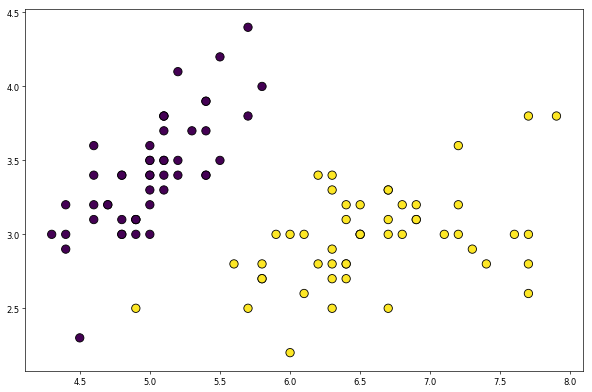

In [111]:
# y값을 0, 1로 만들기 위해서는 idx를 조정하는 것이 아니라, y_data를 2로 나누어줘야 했다.

from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2]) 
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2 # y=0 or y=1

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [77]:
np.random.randn(2)

array([2.2408932 , 1.86755799])

In [131]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)

w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")
d = 1 / (1 + T.exp(- T.dot(X, w) - b))
cost = T.sum((y - d)**2)

In [132]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-2
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [133]:
for i in range(100):
    cost_i = train(X_data, y_data)
    if i % 10 == 0:
        print("{:4d}:".format(i), cost_i)

   0: 24.9683287358724
  10: 41.28173328427803
  20: 42.59328271546607
  30: 29.292579717182946
  40: 12.271523004638164
  50: 15.734017638835661
  60: 20.164603359270753
  70: 6.454368685795003
  80: 2.0806843520492166
  90: 2.022516256954831


In [135]:
y_data.shape

(100,)

In [138]:
y_pred = T.round(d)
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [139]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 0, 50]])